## ML Projects

Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope

- **Dataset Characteristics** : Multivariate

- **Subject Area** : Physical

- **Associated Tasks** : Classification

- **Attribute Type** : Real

- **Instances** : 19020

- **Attributes** : 11

### Information

The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamma telescope observes high energy gamma rays, taking advantage of the radiation emitted by charged particles produced inside the electromagnetic showers initiated by the gammas, and developing in the atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters. The available information consists of pulses left by the incoming Cherenkov photons on the photomultiplier tubes, arranged in a plane, the camera. Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated cluster. Its long axis is oriented towards the camera center if the shower axis is parallel to the telescope's optical axis, i.e. if the telescope axis is directed towards a point source. A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse. The characteristic parameters of this ellipse (often called Hillas parameters) are among the image parameters that can be used for discrimination. The energy depositions are typically asymmetric along the major axis, and this asymmetry can also be used in discrimination. There are, in addition, further discriminating characteristics, like the extent of the cluster in the image plane, or the total sum of depositions.

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).
http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68

### Attribute Information

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm] 
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm] 
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
    11.  class:    g,h         # gamma (signal), hadron (background)

   g = gamma (signal):     12332
   
   h = hadron (background): 6688

   For technical reasons, the number of h events is underestimated. In the real data, the h class represents the majority of the events.

   - The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background. For comparison of different classifiers an ROC curve has to be used. The relevant points on this curve are those, where the probability of accepting a background event as signal is below one of the following thresholds: 0.01, 0.02, 0.05, 0.1, 0.2 depending on the required quality of the sample of the accepted events for different experiments.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [11]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df_magic = pd.read_csv(r'.\\magic+gamma+telescope\\magic04.data',names =cols)

In [12]:
df_magic.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [15]:
df_magic['class'] = (df_magic['class'] == 'g').astype(int)

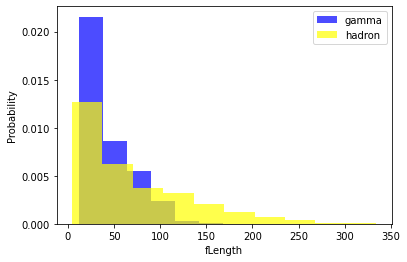

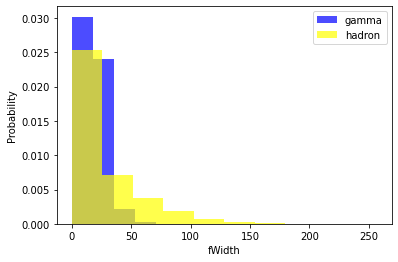

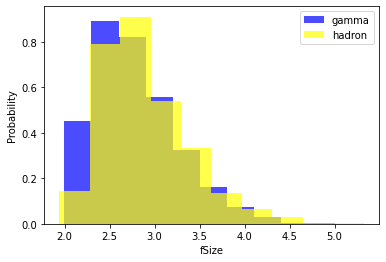

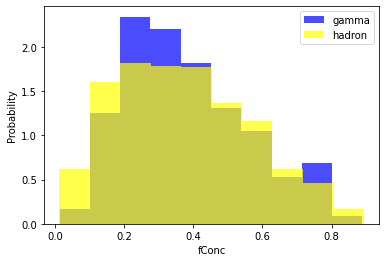

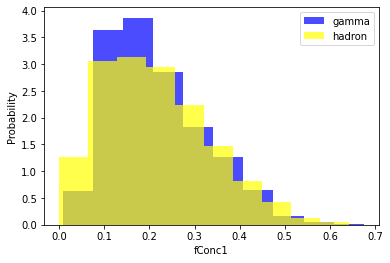

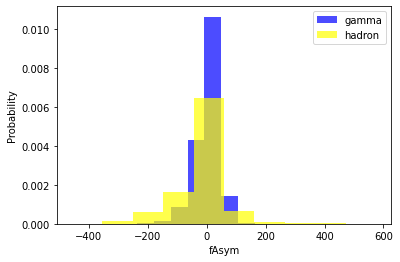

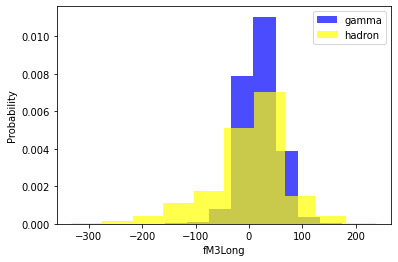

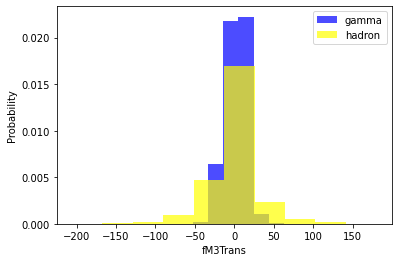

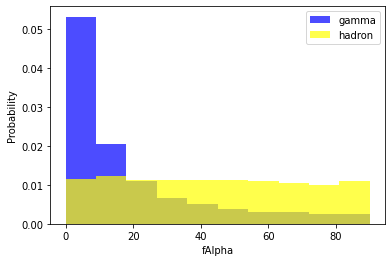

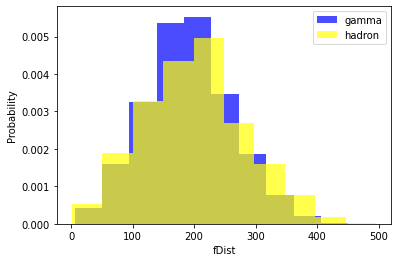

In [154]:
for i in cols[:-1]:
    plt.hist(df_magic[df_magic['class']==1][i],color = 'blue',label= 'gamma',alpha = 0.7,density=True)
    plt.hist(df_magic[df_magic['class']==0][i],color = 'yellow',label = 'hadron' ,alpha = 0.7,density=True)
    plt.xlabel(i)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

In [58]:
# df_magic.pivot_table(aggfunc='count',index='class')
# random.randint(low, high=None, size=None, dtype=int)

In [189]:
train,valid,test = np.split(df_magic.sample(frac = 1) , [int(0.6*len(df_magic)),int(0.8*len(df_magic))])

In [190]:
def scale_dataset(dataframe,oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)
        
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    data = np.hstack((X,np.reshape(y,(-1,1))))
    
    return data,X,y

In [191]:
train,X_train,y_train = scale_dataset(train,oversample=True)
valid,X_valid,y_trainvalid = scale_dataset(valid,oversample=False)
test,X_test,y_test= scale_dataset(test,oversample=False)

## kNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [201]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [202]:
y_pred = knn_model.predict(X_test)

In [203]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1344
           1       0.86      0.83      0.84      2460

    accuracy                           0.80      3804
   macro avg       0.78      0.79      0.79      3804
weighted avg       0.81      0.80      0.80      3804



## Naive Bayes Theorm 

In [204]:
from sklearn.naive_bayes import GaussianNB

In [205]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [207]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52      1344
           1       0.74      0.83      0.78      2460

    accuracy                           0.70      3804
   macro avg       0.67      0.64      0.65      3804
weighted avg       0.69      0.70      0.69      3804



## Logistic Regression

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train,y_train)

In [210]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.76      0.69      1344
           1       0.85      0.75      0.80      2460

    accuracy                           0.75      3804
   macro avg       0.74      0.75      0.74      3804
weighted avg       0.77      0.75      0.76      3804



## SVM

In [211]:
from sklearn.svm import SVC #(support vector classifier)

In [212]:
sv_model = SVC()
sv_model = sv_model.fit(X_train,y_train)

In [213]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.76      0.69      1344
           1       0.85      0.75      0.80      2460

    accuracy                           0.75      3804
   macro avg       0.74      0.75      0.74      3804
weighted avg       0.77      0.75      0.76      3804



## Neural Network

In [217]:
import tensorflow as tf

In [234]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
    
])
nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001),loss = 'binary_crossentropy',
                metrics = ['accuracy'])

In [241]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [237]:
history = nn_model.fit(
    X_train,y_train,epochs=100,batch_size = 32,validation_split = 0.2,verbose = 0)

Epoch 1/100
371/371 [==============================] - 0s 1ms/step - loss: 0.2753 - accuracy: 0.8837 - val_loss: 0.4860 - val_accuracy: 0.7567
Epoch 2/100
371/371 [==============================] - 0s 987us/step - loss: 0.2750 - accuracy: 0.8840 - val_loss: 0.4194 - val_accuracy: 0.7873
Epoch 3/100
371/371 [==============================] - 0s 972us/step - loss: 0.2738 - accuracy: 0.8843 - val_loss: 0.3804 - val_accuracy: 0.8025
Epoch 4/100
371/371 [==============================] - 0s 957us/step - loss: 0.2740 - accuracy: 0.8839 - val_loss: 0.4477 - val_accuracy: 0.7796
Epoch 5/100
371/371 [==============================] - 0s 953us/step - loss: 0.2726 - accuracy: 0.8849 - val_loss: 0.3833 - val_accuracy: 0.7991
Epoch 6/100
371/371 [==============================] - 0s 957us/step - loss: 0.2730 - accuracy: 0.8849 - val_loss: 0.4318 - val_accuracy: 0.7823
Epoch 7/100
371/371 [==============================] - 0s 979us/step - loss: 0.2725 - accuracy: 0.8858 - val_loss: 0.4755 - val_accu

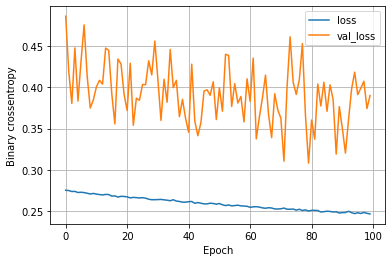

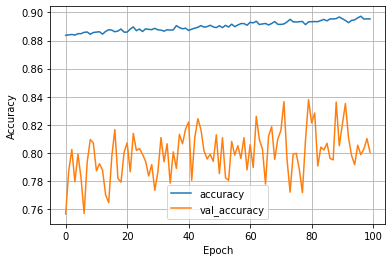

In [242]:
plot_loss(history)
plot_accuracy(history)

## Linear Regression

### Seoul Bike Sharing Demand

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

Download Link : https://archive.ics.uci.edu/static/public/560/seoul+bike+sharing+demand.zip

The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information

- Dataset Characteristics   :  Multivariate

- Subject Area : Business

- Associated Tasks : Regression

- Attribute Type : Integer, Real

- Instances : 8760

- Attributes : 14


#### Attribute Information

- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius 
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [197]:
df_bike = pd.read_csv(r'.\seoul+bike+sharing+demand\SeoulBikeData.csv')

In [198]:
bike_cols = ['Date', 'bike_count', 'hour', 'temp', 'humidity',
       'wind', 'visibility', 'dew_pt_temp', 'radiation',
       'rain', 'snow', 'seasons', 'holiday', 'functional']

df_bike.columns = bike_cols
# ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

In [199]:
df_bike['functional'] = (df_bike['functional']=='Yes').astype(int)

In [200]:
#using only hour = 12
df_bike = df_bike[ df_bike['hour']==12]

In [201]:
df_bike['functional'].sum()
# df_bike.loc[df_bike['functional']<1].count()
# df_bike.loc[df_bike['functional']<1,['functional']].count()

353

In [202]:
df_bike = df_bike[['bike_count', 'temp', 'humidity','wind', 'visibility', 'dew_pt_temp', 'radiation',
                   'rain', 'snow','functional']]

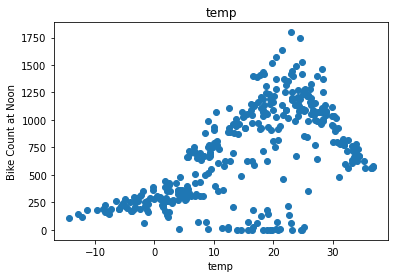

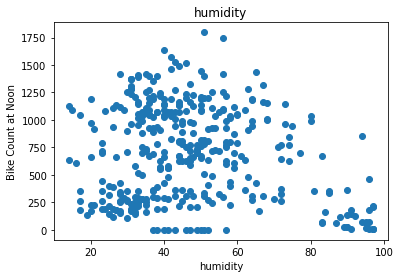

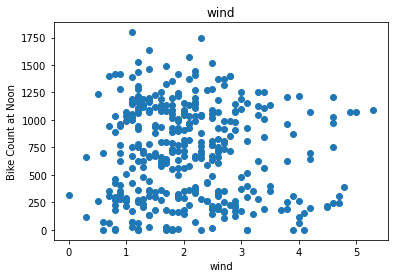

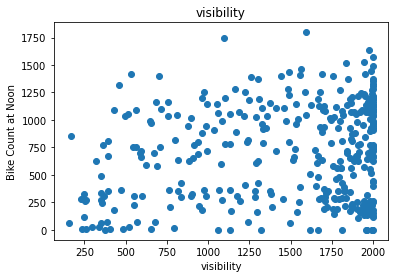

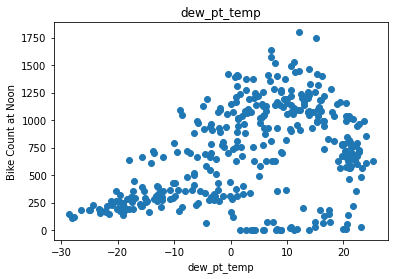

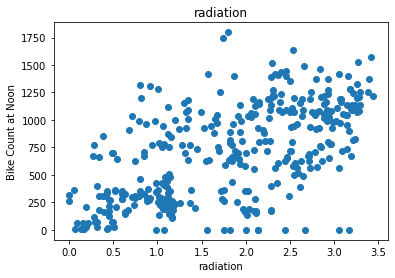

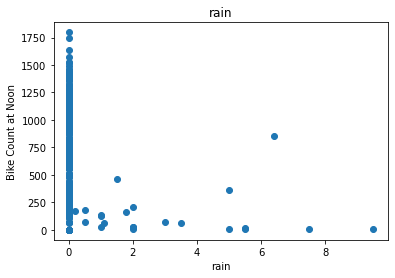

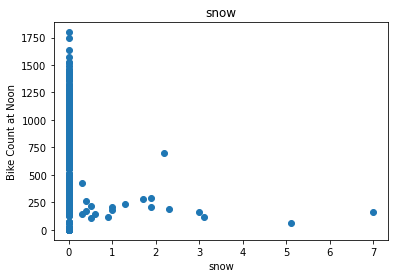

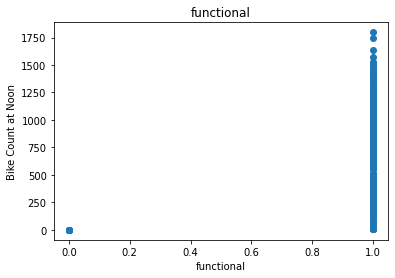

In [203]:
#plotting all the variables
for label in df_bike.columns[1:] :
    plt.scatter(df_bike[label],df_bike["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()


In [204]:
df_bike = df_bike.drop(["wind","visibility","functional"],axis = 1)

In [205]:
df_bike.head(3)

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0


In [206]:
train,val,test = np.split(df_bike.sample(frac=1),[int(0.6*len(df_bike)) , int(0.8*len(df_bike))])

In [207]:
def get_xy(dataframe,y_label,x_labels =None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1,1)
        else:
            X = dataframe[x_labels].values
    
    y = dataframe[y_label].values.reshape(-1,1)
    data = np.hstack((X,y))
    
    return data,X,y
    

In [208]:
_ , X_train_temp,y_train_temp = get_xy(train,"bike_count",x_labels=["temp"])
_ , X_val_temp,y_val_temp = get_xy(val,"bike_count",x_labels=["temp"])
_ , X_test_temp,y_test_temp = get_xy(test,"bike_count",x_labels=["temp"])

In [209]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [210]:
temp_reg.score(X_test_temp,y_test_temp)

0.39695861268311217

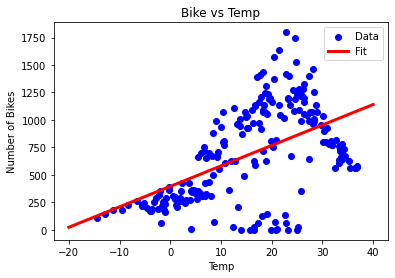

In [211]:
plt.scatter(X_train_temp,y_train_temp,label = 'Data',color='blue')
x = tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth = 3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

## Multiple Linear regression

In [212]:
train,val,test = np.split(df_bike.sample(frac=1),[int(0.6*len(df_bike)) , int(0.8*len(df_bike))])
_ , X_train_all,y_train_all = get_xy(train,"bike_count",x_labels=df_bike.columns[1:])
_ , X_val_all,y_val_all = get_xy(val,"bike_count",x_labels=df_bike.columns[1:])
_ , X_test_all,y_test_all = get_xy(test,"bike_count",x_labels=df_bike.columns[1:])

In [213]:
all_reg = LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [214]:
all_reg.score(X_test_all,y_test_all)

0.3813926196695243

## Regression with Neural Net

In [215]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [216]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [217]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss = 'mean_squared_error')

In [218]:
history = temp_nn_model.fit(
X_train_temp.reshape(-1),y_train_temp,
verbose=0,
epochs=1000,
validation_data = (X_val_temp,y_val_temp))

In [219]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

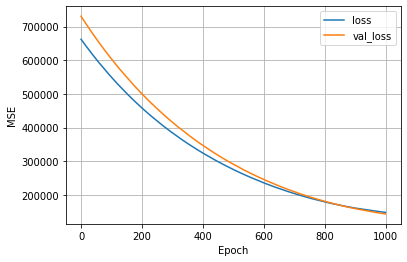

In [220]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


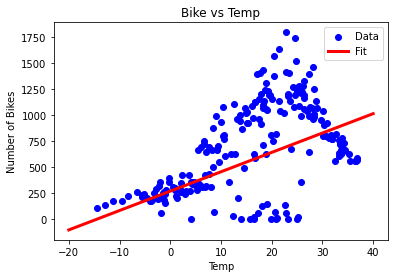

In [221]:
plt.scatter(X_train_temp,y_train_temp,label = 'Data',color='blue')
x = tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth = 3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

## Neural Net

In [260]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,),axis = None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation ='relu'),
    tf.keras.layers.Dense(32,activation ='relu'),
    tf.keras.layers.Dense(32,activation ='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss = 'mean_squared_error')

In [261]:
history = nn_model.fit(
    X_train_temp,y_train_temp,
    validation_data=(X_val_temp,y_val_temp),
    verbose = 0,epochs=100
)

In [262]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
    plt.show()

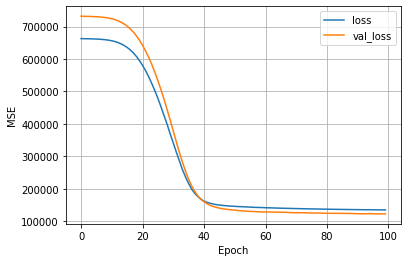

In [263]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


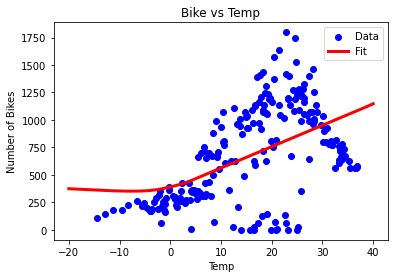

In [264]:
plt.scatter(X_train_temp,y_train_temp,label = 'Data',color='blue')
x = tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label='Fit',color='red',linewidth = 3)
plt.legend()
plt.title("Bike vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

In [265]:
# neural network

all_normalizer = tf.keras.layers.Normalization(input_shape=(6,),axis = -1)
all_normalizer.adapt(X_train_all)

In [266]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation ='relu'),
    tf.keras.layers.Dense(32,activation ='relu'),
    tf.keras.layers.Dense(32,activation ='relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss = 'mean_squared_error')

In [267]:
history = nn_model.fit(
    X_train_all,y_train_all,
    validation_data=(X_val_all,y_val_all),
    verbose = 0,epochs=100
)

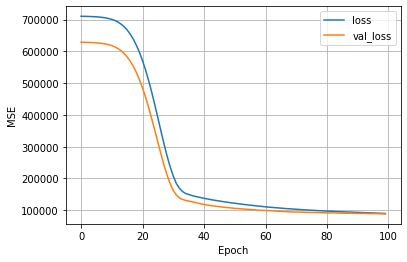

In [268]:
plot_loss(history)

In [269]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 2ms/step


In [270]:
def MSE(y_pred,y_real):
    return (np.square(y_pred-y_real)).mean()

In [271]:
MSE(y_pred_lr,y_test_all)

137483.34900771495

In [272]:
MSE(y_pred_nn,y_test_all)

132360.54461478948

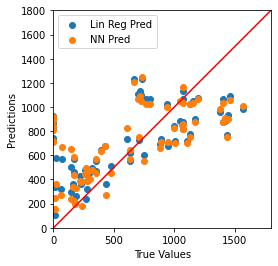

In [273]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all,y_pred_lr,label = "Lin Reg Pred")
plt.scatter(y_test_all,y_pred_nn,label = "NN Pred")
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0,1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims,lims,c="red")

## Unsupervised learning

- Measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

Dataset Characteristics: Multivariate

Subject Area : Life

Associated Tasks : Classification, Clustering

Attribute Type : Real

Instances : 210

Attributes : 7


Additional Information

- The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.
 The data set can be used for the tasks of classification and cluster analysis.

1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

All of these parameters were real-valued continuous.

In [280]:
names = cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]
df_seed = pd.read_csv(r'.\seeds\seeds_dataset.txt',names = cols, sep = '\s+')

In [282]:
df_seed.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


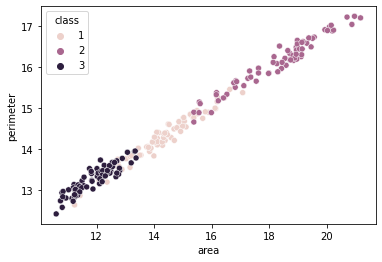

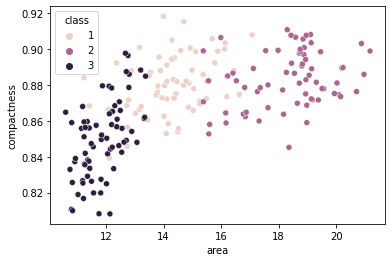

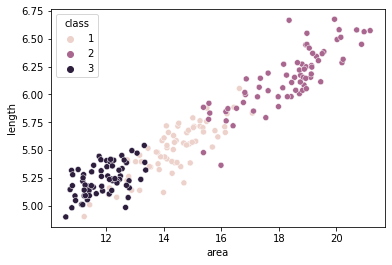

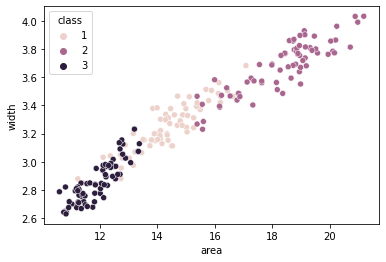

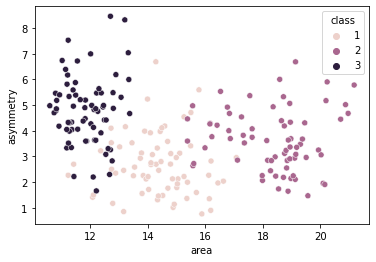

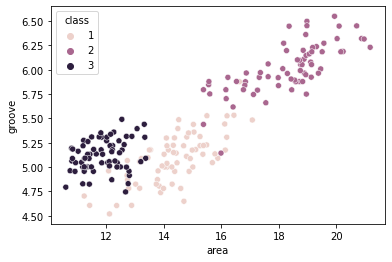

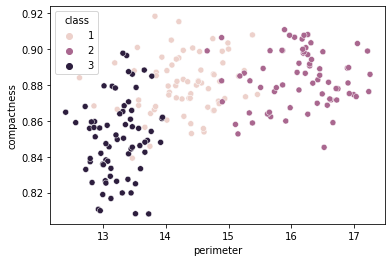

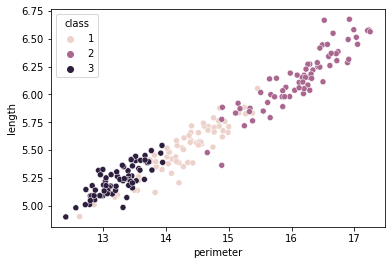

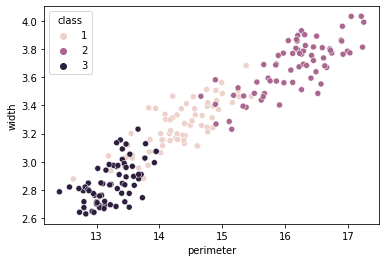

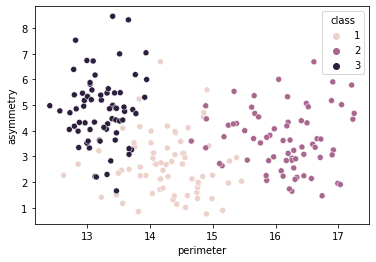

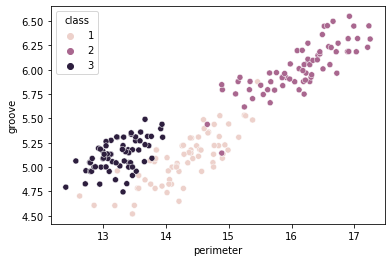

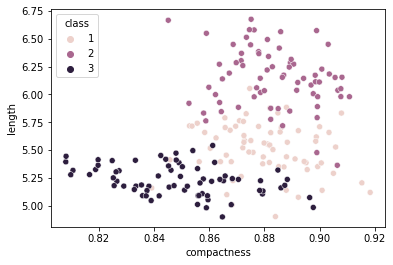

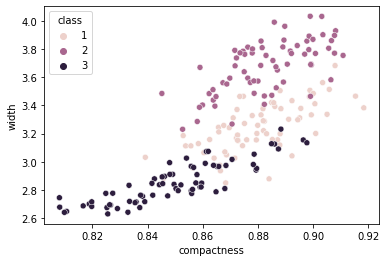

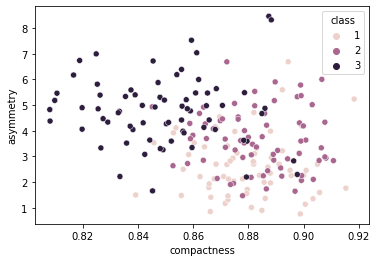

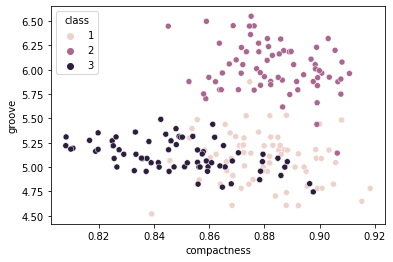

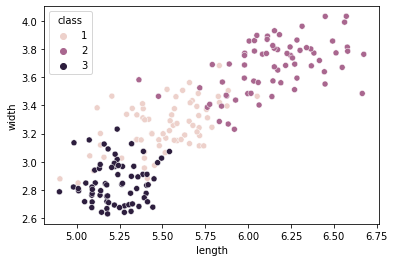

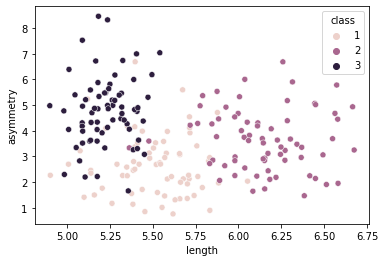

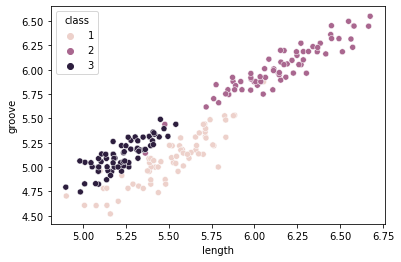

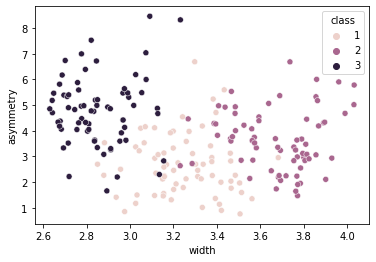

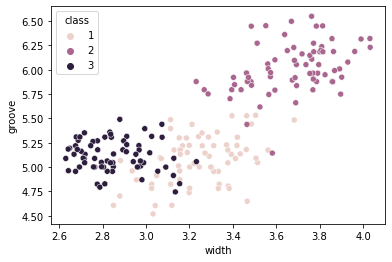

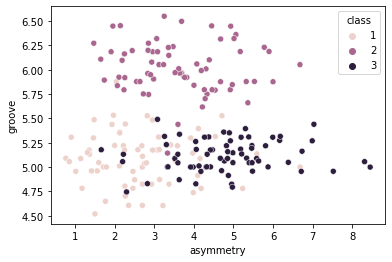

In [285]:
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)-1):
        x_label = cols[i]
        y_label = cols[j]
        sns.scatterplot(x=x_label,y=y_label,data = df_seed,hue = 'class')
        plt.show()

### Clustering

In [286]:
from sklearn.cluster import KMeans

In [289]:
x = "perimeter"
y = "asymmetry"
X = df_seed[[x,y]].values

In [290]:
kmeans = KMeans(n_clusters=3).fit(X)

C:\Users\deeks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [295]:
clusters = kmeans.labels_

In [298]:
cluster_df = pd.DataFrame(np.hstack((X,clusters.reshape(-1,1))),columns = [x,y,"class"])

[]

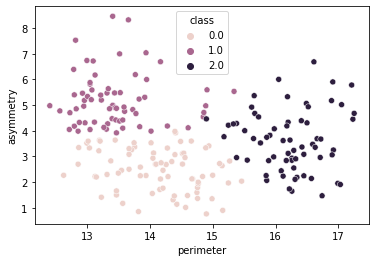

In [300]:
# K Means Cluster
sns.scatterplot(x=x,y=y,hue="class",data= cluster_df)
plt.plot()

[]

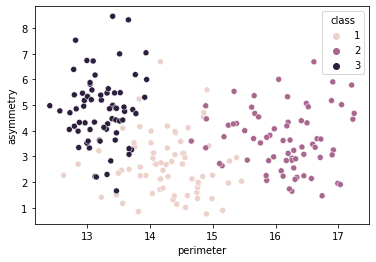

In [301]:
# Original Cluster
sns.scatterplot(x=x,y=y,hue="class",data= df_seed)
plt.plot()

### Higher Dimension

In [308]:
X = df_seed[cols[:-1]].values

In [309]:
kmeans = KMeans(n_clusters = 3).fit(X)

C:\Users\deeks\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [311]:
cluster_df = pd.DataFrame(np.hstack((X,kmeans.labels_.reshape(-1,1))),columns = df_seed.columns)

[]

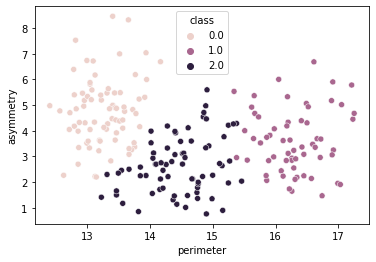

In [312]:
# K Means Cluster
sns.scatterplot(x=x,y=y,hue="class",data= cluster_df)
plt.plot()

[]

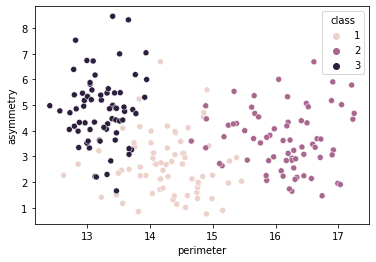

In [313]:
# Original Cluster
sns.scatterplot(x=x,y=y,hue="class",data= df_seed)
plt.plot()

### PCA

In [314]:
from sklearn.decomposition import PCA

In [315]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)

In [316]:
X.shape

(210, 7)

In [317]:
transformed_x.shape

(210, 2)

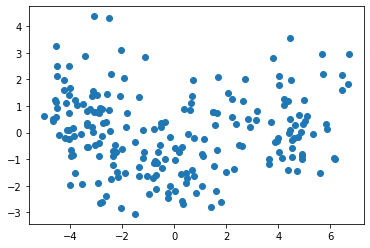

In [318]:
plt.scatter(transformed_x[:,0],transformed_x[:,1])
plt.show()

In [321]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x,kmeans.labels_.reshape(-1,1))),columns=["pca1","pca2","class"])

In [322]:
truth_pca_df = pd.DataFrame(np.hstack((transformed_x,df_seed["class"].values.reshape(-1,1))),columns=["pca1","pca2","class"])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

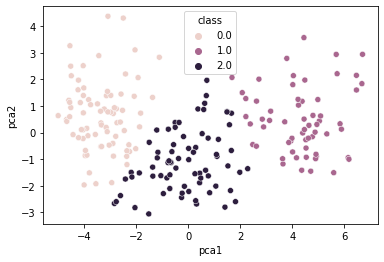

In [324]:
sns.scatterplot(x='pca1',y='pca2',hue = 'class',data=kmeans_pca_df)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

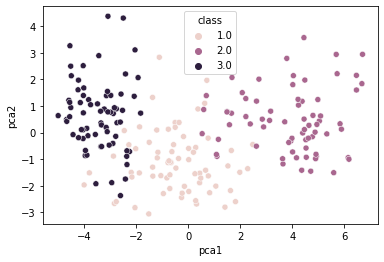

In [325]:
sns.scatterplot(x='pca1',y='pca2',hue = 'class',data=truth_pca_df)
plt.plot